### Offshore converter (Energyhub) capacities

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

CASES = ["base", "cap50", "floatingCap50", "cables50", "opex50"]

DF_BY_CASES = dict({})

for case in CASES:
    _df = pd.read_csv(f'offshore_converter/{case}_results_output_offshoreConverter.csv')
    DF_BY_CASES[case] = _df

DF_BY_CASES

{'base':           Node     Period  Converter invested capacity [MW]  \
 0  EnergyhubEU  2020-2025                      3.835714e-03   
 1  EnergyhubEU  2025-2030                      9.194210e-06   
 2  EnergyhubEU  2030-2035                      4.908899e-03   
 3  EnergyhubEU  2035-2040                      7.149374e-07   
 4  EnergyhubEU  2040-2045                      2.258577e-02   
 5  EnergyhubEU  2045-2050                      1.726229e-04   
 6  EnergyhubEU  2050-2055                      7.300304e-07   
 7  EnergyhubEU  2055-2060                      3.426026e-07   
 
    Converter total capacity [MW]  
 0                       0.003836  
 1                       0.003845  
 2                       0.008754  
 3                       0.008754  
 4                       0.031340  
 5                       0.031513  
 6                       0.031514  
 7                       0.031514  ,
 'cap50':           Node     Period  Converter invested capacity [MW]  \
 0  EnergyhubEU 

In [20]:
def plot_offshore_converter_cap(case, _df):
    df = _df[["Node", "Period", "Converter total capacity [MW]"]]

    prod_converter_2050 = df[df["Period"] == "2055-2060"]["Converter total capacity [MW]"].sum()
    print(f"Offshore converter total capacity 2050: {round(prod_converter_2050/1000, 2)} GW")

    periods = list(df["Period"].unique())
    nodes_sorted_by_cap = list(df[df["Period"] == "2055-2060"]\
                              .sort_values(by="Converter total capacity [MW]", ascending=False)["Node"].values)
    
    nodes_displayed = nodes_sorted_by_cap
    installed_caps = []
    for node in nodes_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df[(df["Node"] == node) & (df["Period"] == period)]["Converter total capacity [MW]"].values[0])

        # Remove nodes that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            nodes_displayed.remove(node)
            print(f"Offshore converter total capacity 2050 is 0 GW for case: {case}\n")
            return
        else:
            installed_caps.append(cap_by_period)
    
    installed_caps_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps]
    period_displayed = [period.split("-")[0] for period in periods]

    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(10,8))
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.stackplot(period_displayed, installed_caps_GW, labels=nodes_displayed)
    plt.ylabel('Offshore converter capacity [GW]')
    plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
    plt.margins(x=0)
    plt.title(f"Offshore converter capacity for case: {case}")
    plt.show()

Offshore converter total capacity 2050: 0.0 GW
Offshore converter total capacity 2050 is 0 GW for case: base

Offshore converter total capacity 2050: 118.41 GW


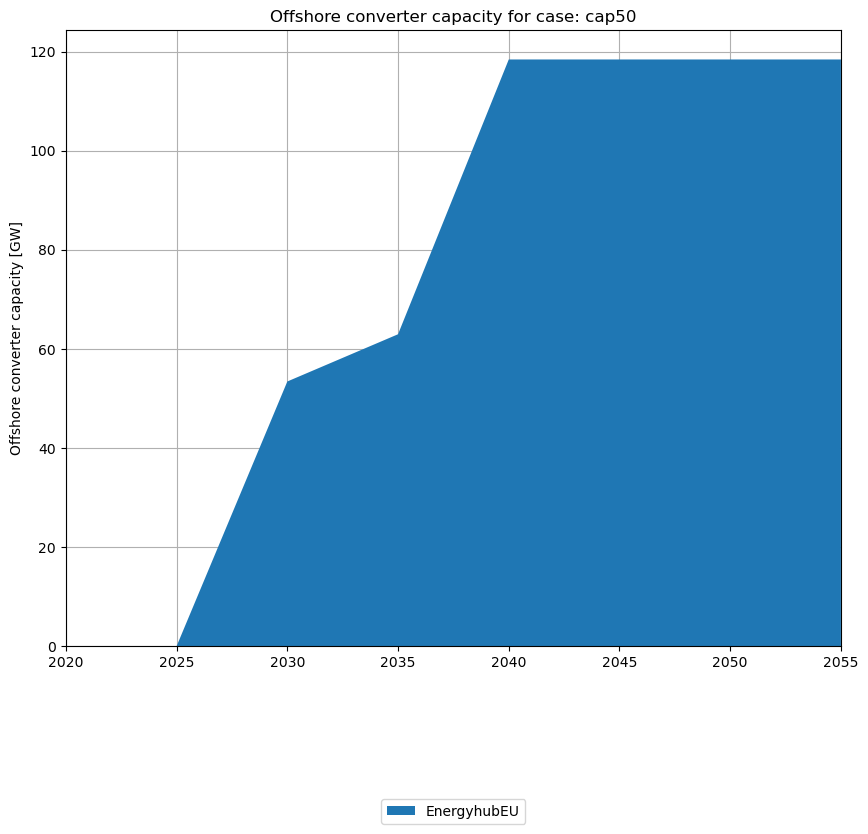

Offshore converter total capacity 2050: 84.76 GW


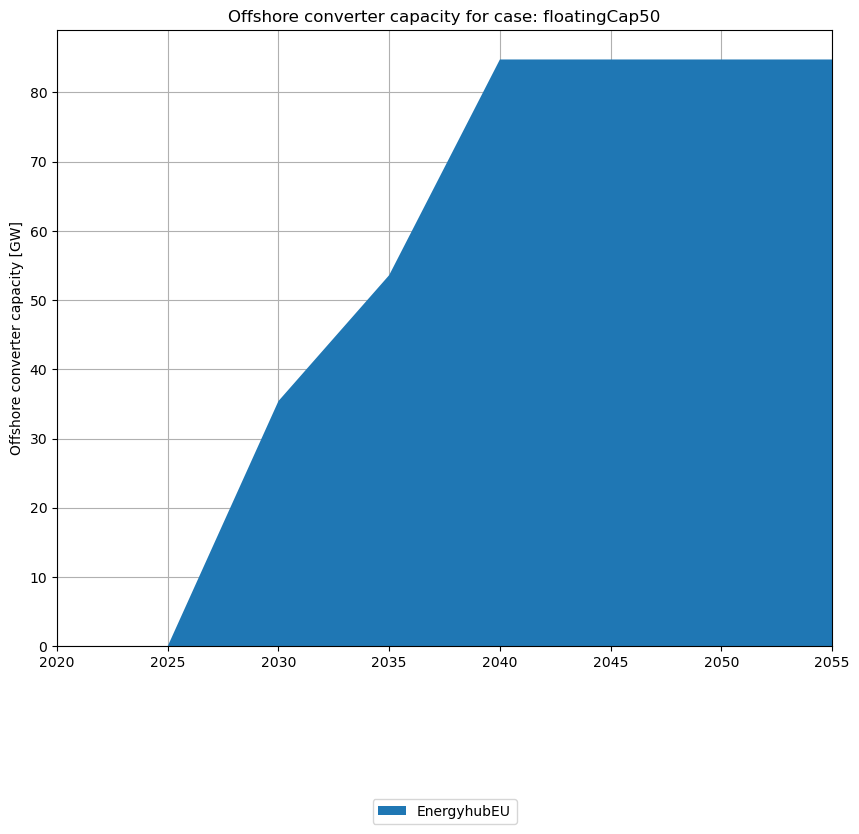

Offshore converter total capacity 2050: 27.3 GW


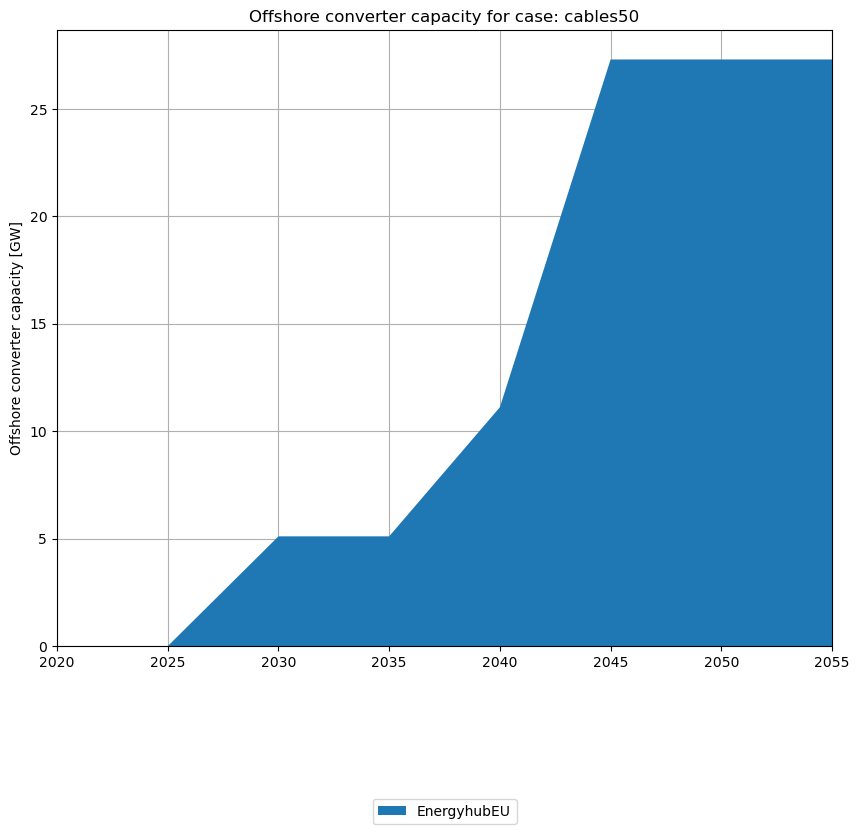

Offshore converter total capacity 2050: 99.48 GW


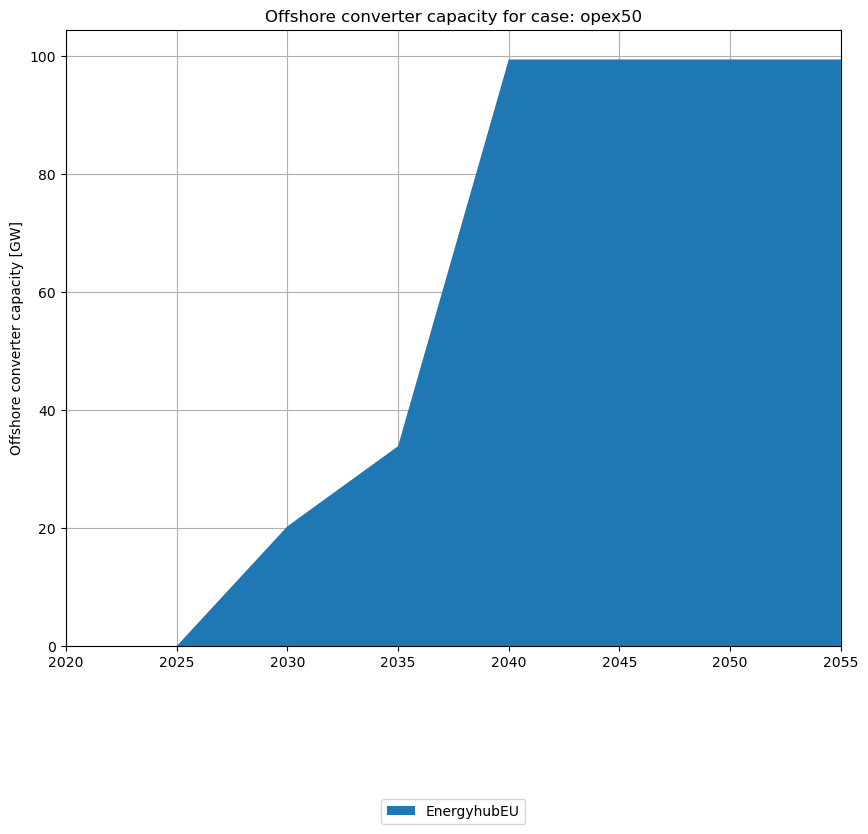

In [21]:
for case, _df in DF_BY_CASES.items():
    plot_offshore_converter_cap(case, _df)